In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [167]:
data = pd.read_csv(r"C:\Users\user\Desktop\guvi pro\airline_review_NLP\Airline_Reviews.csv")
data.head(4)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [169]:
check_bal = data["Recommended"].value_counts()
check_bal

Recommended
no     15364
yes     7807
Name: count, dtype: int64

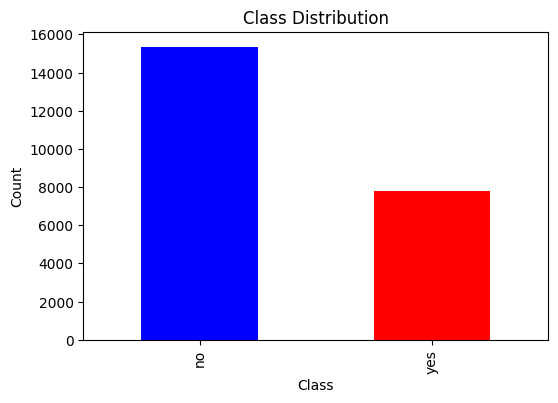

In [170]:
plt.figure(figsize=(6,4))
check_bal.plot(kind='bar' , color=["blue","red"])
plt.title('Class Distribution')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

In [171]:
data["Overall_Rating"].value_counts()

Overall_Rating
1    11595
2     2296
9     1768
8     1757
3     1356
7     1192
4      859
n      842
5      830
6      676
Name: count, dtype: int64

In [172]:
# Replace 'n' with 0 in the 'Overall_Rating' column
data['Overall_Rating'] = data['Overall_Rating'].replace('n', '0').astype(int)



In [173]:
data["Overall_Rating"].value_counts()

Overall_Rating
1    11595
2     2296
9     1768
8     1757
3     1356
7     1192
4      859
0      842
5      830
6      676
Name: count, dtype: int64

In [174]:
#Now let's convert this columns into only 4 different values
data['New_Ratings'] = pd.cut(data['Overall_Rating'], 4, labels = [1,2,3,4])
data['New_Ratings'].unique()

[4, 1, 2, 3]
Categories (4, int64): [1 < 2 < 3 < 4]

In [175]:
data.tail(4)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,...,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,New_Ratings
23167,23167,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,Avoid at all costs. I booked flights to go f...,NaN,Solo Leisure,Economy Class,...,June 2022,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no,1
23168,23168,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,True,Flight was leaving at 23.15 and after an hou...,NaN,Business,Economy Class,...,May 2022,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no,2
23169,23169,ZIPAIR,6,"""It was immaculately clean""",23rd May 2022,True,Zipair is JAL’s budget airline. They don’t ha...,Dreamliner,Business,Business Class,...,May 2022,3.0,4.0,3.0,1.0,2.0,5.0,5.0,yes,3
23170,23170,ZIPAIR,1,"""lost all of our money with no refund""",20th May 2022,True,They lied about connection in Narita and we ...,NaN,Solo Leisure,Economy Class,...,May 2022,NaN,NaN,NaN,1.0,NaN,NaN,1.0,no,1


In [176]:
#Now let's get rid of some unuseful columns
data = data.drop(['Unnamed: 0','Overall_Rating'], axis=1)

In [177]:
data.columns

Index(['Airline Name', 'Review_Title', 'Review Date', 'Verified', 'Review',
       'Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity',
       'Value For Money', 'Recommended', 'New_Ratings'],
      dtype='object')

In [178]:
data['Verified'].value_counts()

Verified
True     12322
False    10849
Name: count, dtype: int64

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Airline Name            23171 non-null  object  
 1   Review_Title            23171 non-null  object  
 2   Review Date             23171 non-null  object  
 3   Verified                23171 non-null  bool    
 4   Review                  23171 non-null  object  
 5   Aircraft                7129 non-null   object  
 6   Type Of Traveller       19433 non-null  object  
 7   Seat Type               22075 non-null  object  
 8   Route                   19343 non-null  object  
 9   Date Flown              19417 non-null  object  
 10  Seat Comfort            19016 non-null  float64 
 11  Cabin Staff Service     18911 non-null  float64 
 12  Food & Beverages        14500 non-null  float64 
 13  Ground Service          18378 non-null  float64 
 14  Inflight Entertainment

In [180]:
data.tail(3)

,Airline Name,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,New_Ratings
23168,ZIPAIR,"""Will not recommend to anyone""",31st May 2022,True,Flight was leaving at 23.15 and after an hou...,NaN,Business,Economy Class,Bangkok to Tokyo,May 2022,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no,2
23169,ZIPAIR,"""It was immaculately clean""",23rd May 2022,True,Zipair is JAL’s budget airline. They don’t ha...,Dreamliner,Business,Business Class,Tokyo to Los Angeles,May 2022,3.0,4.0,3.0,1.0,2.0,5.0,5.0,yes,3
23170,ZIPAIR,"""lost all of our money with no refund""",20th May 2022,True,They lied about connection in Narita and we ...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,May 2022,NaN,NaN,NaN,1.0,NaN,NaN,1.0,no,1


In [181]:
data.isnull().sum()

Airline Name                  0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
New_Ratings                   0
dtype: int64

In [182]:
data.shape

(23171, 19)

In [183]:
#Dropping 'Aircraft', 'Wifi & Connectivity', 'Route' and 'Inflight Entertainment' columns.
data = data.drop(["Aircraft" , "Wifi & Connectivity" , "Route" , "Inflight Entertainment"], axis=1)

In [184]:
# #Dropping the rows which 'Food & Beverages' is null.
data = data.dropna(axis=0 ,subset=['Food & Beverages'])

In [185]:
data.head(5)

,Airline Name,Review_Title,Review Date,Verified,Review,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,New_Ratings
0,AB Aviation,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,Solo Leisure,Economy Class,November 2019,4.0,5.0,4.0,4.0,3.0,yes,4
1,AB Aviation,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,Solo Leisure,Economy Class,June 2019,2.0,2.0,1.0,1.0,2.0,no,1
2,AB Aviation,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Solo Leisure,Economy Class,June 2019,2.0,1.0,1.0,1.0,2.0,no,1
4,Adria Airways,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,Couple Leisure,Economy Class,September 2019,1.0,1.0,1.0,1.0,1.0,no,1
5,Adria Airways,"""Had very bad experience""",17th September 2019,True,Had very bad experience with rerouted and ca...,Couple Leisure,Economy Class,September 2019,1.0,1.0,1.0,1.0,1.0,no,1


In [186]:
data.isnull().sum()

Airline Name              0
Review_Title              0
Review Date               0
Verified                  0
Review                    0
Type Of Traveller      1388
Seat Type                16
Date Flown             1398
Seat Comfort              1
Cabin Staff Service       1
Food & Beverages          0
Ground Service         1392
Value For Money           0
Recommended               0
New_Ratings               0
dtype: int64

In [187]:
data['Airline Name'].value_counts()

Airline Name
Dragonair                  99
TAM Airlines               98
China Southern Airlines    98
Hainan Airlines            97
Royal Brunei Airlines      97
                           ..
Air Cote d'Ivoire           1
Safi Airways                1
Safarilink                  1
Manta Air                   1
MEGA Maldives Airlines      1
Name: count, Length: 448, dtype: int64

In [188]:
# drop  the airline name it  as more than 400 diff names :
data = data.drop(['Airline Name'], axis=1)

# EDA

In [189]:
data["Recommended"].value_counts()

Recommended
no     8573
yes    5927
Name: count, dtype: int64

In [190]:
data["New_Ratings"].value_counts()

New_Ratings
1    8362
4    3584
2    1503
3    1051
Name: count, dtype: int64

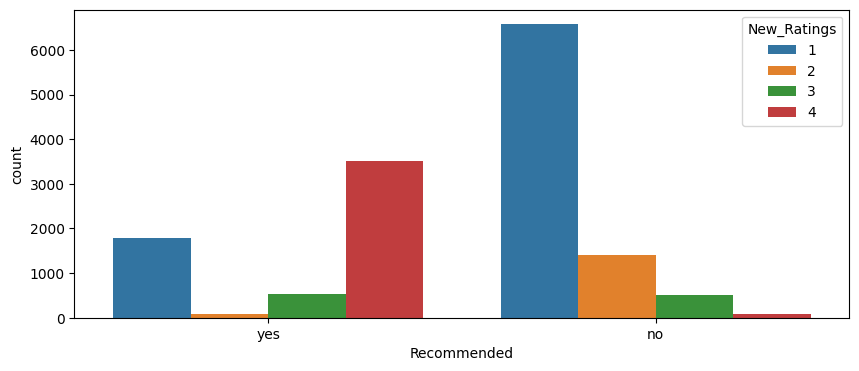

In [191]:
# EDA :
# plotting the data :
plt.figure(figsize=(10,4))
sns.countplot(data = data , x ="Recommended" , hue = "New_Ratings")
plt.show()


In [192]:
data["Verified"].value_counts()

Verified
True     8174
False    6326
Name: count, dtype: int64

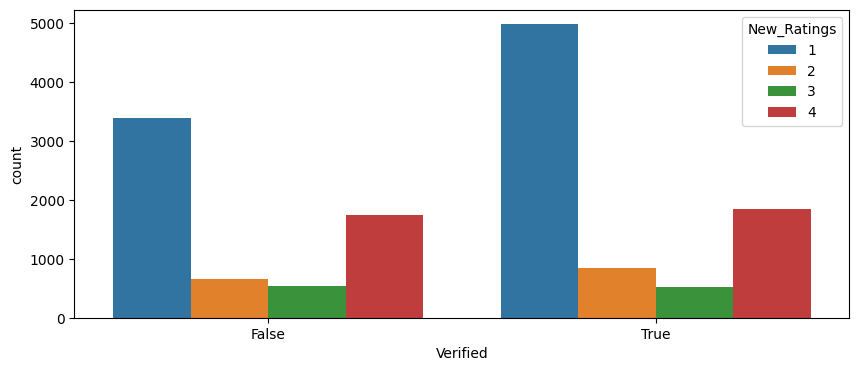

In [193]:
plt.figure(figsize=(10,4))
sns.countplot(data = data , x ="Verified" , hue = "New_Ratings")
plt.show()

In [194]:
data.head(5)

,Review_Title,Review Date,Verified,Review,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,New_Ratings
0,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,Solo Leisure,Economy Class,November 2019,4.0,5.0,4.0,4.0,3.0,yes,4
1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,Solo Leisure,Economy Class,June 2019,2.0,2.0,1.0,1.0,2.0,no,1
2,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Solo Leisure,Economy Class,June 2019,2.0,1.0,1.0,1.0,2.0,no,1
4,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,Couple Leisure,Economy Class,September 2019,1.0,1.0,1.0,1.0,1.0,no,1
5,"""Had very bad experience""",17th September 2019,True,Had very bad experience with rerouted and ca...,Couple Leisure,Economy Class,September 2019,1.0,1.0,1.0,1.0,1.0,no,1


In [195]:
data['New_Ratings']= data['New_Ratings'].astype(int)
data['New_Ratings'].dtype

dtype('int32')

In [196]:
data = data.drop(["Date Flown" , "Review Date"], axis=1)

In [197]:
# find duplicates :
no_of_dup = data.duplicated().sum()
print("no_of_dup : " , no_of_dup)
#print duplicates :
data[data.duplicated()]



no_of_dup :  4


,Review_Title,Verified,Review,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,New_Ratings
16641,"""give away your seat""",True,Anchorage to Kenai. They will give away your...,Business,Economy Class,1.0,1.0,1.0,1.0,1.0,no,1
16642,"""overall experience was fantastic""",True,I flew on Ravn Alaska with my girlfriend bac...,Couple Leisure,Economy Class,5.0,5.0,5.0,5.0,5.0,yes,1
16644,"""delayed with no explanation",True,Anchorage to Homer. Last 4 times I have flow...,Solo Leisure,Economy Class,3.0,5.0,3.0,2.0,3.0,no,3
16645,"""never be using Ravn again""",False,"Ravn Alaska is so frustrating. First off, your...",Couple Leisure,Economy Class,1.0,3.0,3.0,1.0,2.0,no,2


In [198]:
data = data.drop_duplicates()

In [199]:
#check duplicates :
no_of_dup = data.duplicated().sum()
print("no_of_dup : " , no_of_dup)

no_of_dup :  0


In [200]:
data.isnull().sum()

Review_Title              0
Verified                  0
Review                    0
Type Of Traveller      1388
Seat Type                16
Seat Comfort              1
Cabin Staff Service       1
Food & Beverages          0
Ground Service         1392
Value For Money           0
Recommended               0
New_Ratings               0
dtype: int64

In [201]:
# treting null values :
data['Seat Comfort'] = data['Seat Comfort'].fillna(0)
data['Cabin Staff Service'] = data['Cabin Staff Service'].fillna(0)

In [202]:
data.isnull().sum()

Review_Title              0
Verified                  0
Review                    0
Type Of Traveller      1388
Seat Type                16
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service         1392
Value For Money           0
Recommended               0
New_Ratings               0
dtype: int64

In [203]:
data['Seat Type'].value_counts()


Seat Type
Economy Class      11951
Business Class      1840
Premium Economy      525
First Class          164
Name: count, dtype: int64

In [204]:
# fill null values for the 'Seat Type' column as mode :
data["Seat Type"] = data["Seat Type"].fillna(data["Seat Type"].mode()[0])

In [205]:
data.isnull().sum()

Review_Title              0
Verified                  0
Review                    0
Type Of Traveller      1388
Seat Type                 0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service         1392
Value For Money           0
Recommended               0
New_Ratings               0
dtype: int64

In [206]:
data = data.drop(['Type Of Traveller'], axis=1)

In [207]:
data.isnull().sum()

Review_Title              0
Verified                  0
Review                    0
Seat Type                 0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service         1392
Value For Money           0
Recommended               0
New_Ratings               0
dtype: int64

In [208]:
data["Ground Service"] = data["Ground Service"].fillna(data["Ground Service"].mode()[0])

In [209]:
data.isnull().sum()

Review_Title           0
Verified               0
Review                 0
Seat Type              0
Seat Comfort           0
Cabin Staff Service    0
Food & Beverages       0
Ground Service         0
Value For Money        0
Recommended            0
New_Ratings            0
dtype: int64

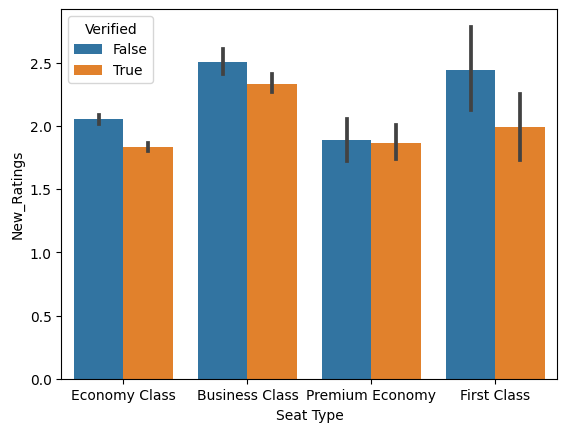

In [210]:
#plt.figure(figsize=(8,4))
sns.barplot(x = "Seat Type" , y = "New_Ratings" , hue ="Verified" , data = data)
plt.show()

In [211]:
# drop unnecessary columns :
data = data.drop(["Review_Title"], axis=1)
data.head(5)

,Verified,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,New_Ratings
0,True,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,3.0,yes,4
1,True,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,2.0,no,1
2,True,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,2.0,no,1
4,True,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,no,1
5,True,Had very bad experience with rerouted and ca...,Economy Class,1.0,1.0,1.0,1.0,1.0,no,1


In [212]:
# label encoding :
data["Recommended"] = data["Recommended"].map({"yes":1 , "no":0})

In [213]:
data.head(5)

,Verified,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,New_Ratings
0,True,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,3.0,1,4
1,True,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,2.0,0,1
2,True,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,2.0,0,1
4,True,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,0,1
5,True,Had very bad experience with rerouted and ca...,Economy Class,1.0,1.0,1.0,1.0,1.0,0,1


In [214]:
data["Seat Type"].value_counts()

Seat Type
Economy Class      11967
Business Class      1840
Premium Economy      525
First Class          164
Name: count, dtype: int64

In [223]:
# do label encoding :
# Define the mapping dictionary
seat_type_mapping = {
    'Economy Class': 0,
    'Business Class': 1,
    'Premium Economy': 2,
    'First Class': 3
}

# Apply the mapping using the map function
data['Seat Type'] = data['Seat Type'].map(seat_type_mapping)


In [224]:
data["Seat Type"].value_counts()

Seat Type
0    11967
1     1840
2      525
3      164
Name: count, dtype: int64

In [225]:
data.head(5)

,Verified,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,New_Ratings
0,True,Moroni to Moheli. Turned out to be a pretty ...,0,4.0,5.0,4.0,4.0,3.0,1,4
1,True,Moroni to Anjouan. It is a very small airline...,0,2.0,2.0,1.0,1.0,2.0,0,1
2,True,Anjouan to Dzaoudzi. A very small airline an...,0,2.0,1.0,1.0,1.0,2.0,0,1
4,True,Do not book a flight with this airline! My fr...,0,1.0,1.0,1.0,1.0,1.0,0,1
5,True,Had very bad experience with rerouted and ca...,0,1.0,1.0,1.0,1.0,1.0,0,1


In [228]:
data = data.drop(["Verified"], axis=1)

In [229]:
data.head(5)

,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,New_Ratings
0,Moroni to Moheli. Turned out to be a pretty ...,0,4.0,5.0,4.0,4.0,3.0,1,4
1,Moroni to Anjouan. It is a very small airline...,0,2.0,2.0,1.0,1.0,2.0,0,1
2,Anjouan to Dzaoudzi. A very small airline an...,0,2.0,1.0,1.0,1.0,2.0,0,1
4,Do not book a flight with this airline! My fr...,0,1.0,1.0,1.0,1.0,1.0,0,1
5,Had very bad experience with rerouted and ca...,0,1.0,1.0,1.0,1.0,1.0,0,1


# now data is reasy for NLP and ML :